# Reducing hospital readmissions
## Background

The next project is for a hospital group to help then to a better understand of patient readmissions. The hospital gave us access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission.

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
h = pd.read_csv('hospital_readmissions.csv')

In [3]:
h.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## Tasks

Create a report that covers the following:

- What is the most common primary diagnosis by age group? Some doctors believe diabetes might play a central role in readmission.
- Explore the effect of a diabetes diagnosis on readmission rates.
- On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?


## Data 

Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

## Data Cleaning.

Before delving into our analysis, we recognized the paramount importance of data quality. We initiated our investigation by meticulously identifying redundancies, influential values, and potential biases that could impact the statistical robustness of our conclusions. 

### Handling Null Values.

Our first line of inquiry led us to explore the presence of null values within the dataset. Missing data can skew results and lead to erroneous interpretations. Through meticulous examination, we identified specific attributes and variables afflicted by null values.

In [4]:
h.isnull().any()

age                  False
time_in_hospital     False
n_lab_procedures     False
n_procedures         False
n_medications        False
n_outpatient         False
n_inpatient          False
n_emergency          False
medical_specialty    False
diag_1               False
diag_2               False
diag_3               False
glucose_test         False
A1Ctest              False
change               False
diabetes_med         False
readmitted           False
dtype: bool

### Handling Format and classification of the data.

Is important to have a consinten format and a classification of the data that help us to make the representations and plots easy to read:

In [5]:
h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
h['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[40-50)', '[80-90)', '[90-100)'],
      dtype=object)

In [7]:
h['medical_specialty'].unique()

array(['Missing', 'Other', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery', 'Emergency/Trauma'], dtype=object)

In [8]:
h['diag_1'].unique()

array(['Circulatory', 'Other', 'Injury', 'Digestive', 'Respiratory',
       'Diabetes', 'Musculoskeletal', 'Missing'], dtype=object)

In [9]:
h['diag_2'].unique()

array(['Respiratory', 'Other', 'Circulatory', 'Injury', 'Diabetes',
       'Digestive', 'Musculoskeletal', 'Missing'], dtype=object)

In [10]:
h['diag_3'].unique()

array(['Other', 'Circulatory', 'Diabetes', 'Respiratory', 'Injury',
       'Musculoskeletal', 'Digestive', 'Missing'], dtype=object)

In [11]:
h['glucose_test'].unique()

array(['no', 'normal', 'high'], dtype=object)

In [12]:
h['A1Ctest'].unique()

array(['no', 'normal', 'high'], dtype=object)

In [13]:
h['change'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
h['diabetes_med'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
h['readmitted'].unique()

array(['no', 'yes'], dtype=object)

We can see that every column have a consisten format, so we can continue whit the analysis.

## Primary Diagnosis by Age Group,

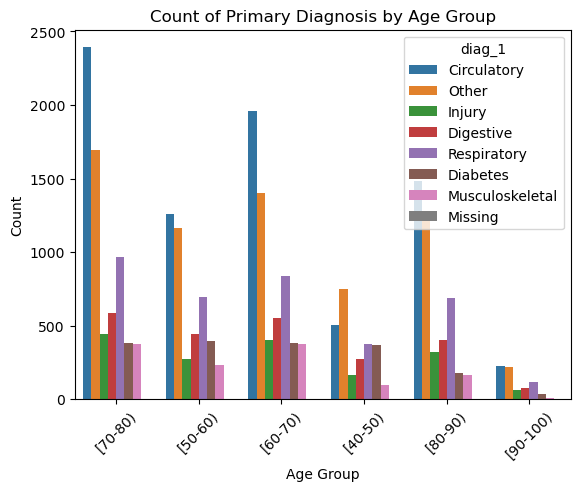

In [16]:
sns.countplot(data=h, x='age', hue='diag_1')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Primary Diagnosis by Age Group')
plt.xticks(rotation=45)
plt.show()

#### Table 1 - Count Age/Diagnosis.

In [17]:
# Create a cross-tabulation of age and diag_1
diag_by_age = pd.crosstab(index=h['age'], columns=h['diag_1'])

# Display the cross-tabulation as a table
print(diag_by_age)


diag_1    Circulatory  Diabetes  Digestive  Injury  Missing  Musculoskeletal  \
age                                                                            
[40-50)           504       369        271     162        0              100   
[50-60)          1256       393        442     273        0              230   
[60-70)          1962       385        554     400        1              373   
[70-80)          2392       385        585     444        1              373   
[80-90)          1482       181        402     321        2              168   
[90-100)          228        34         75      66        0                8   

diag_1    Other  Respiratory  
age                           
[40-50)     750          376  
[50-60)    1164          694  
[60-70)    1402          836  
[70-80)    1693          964  
[80-90)    1269          691  
[90-100)    220          119  


We can observe clearly that the most common diagnosis is **Circulatory**, the next cuestion to our primary diagnosis is to know what is the percentage of readmitions based on these diagnosis.

In [18]:
readmitted = h[h['readmitted'] == 'yes']

#### Table 2 - Number of pattiens Readmitted by First Diagnosis.

In [19]:
a = readmitted['diag_1'].value_counts()
a

diag_1
Circulatory        3750
Other              2932
Respiratory        1806
Digestive          1105
Diabetes            937
Injury              727
Musculoskeletal     495
Missing               2
Name: count, dtype: int64

In [20]:
o = h['diag_1'].value_counts()
o

diag_1
Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: count, dtype: int64

In [21]:
diag = ['Circulatory', 'Other', 'Respiratory', 'Digestive', 'Diabetes', 'Injury', 'Musculoskeletal', 'Missing']

In [22]:
len(a)

8

In [23]:
dia = o.tolist()
rea = a.tolist()

res = [(x*100)/y for x, y in zip(rea, dia)]

In [24]:
res

[47.92944785276074,
 45.12157586949831,
 49.07608695652174,
 47.44525547445255,
 53.63480251860332,
 43.637454981992796,
 39.53674121405751,
 50.0]

In [25]:
per = {'diag_1': diag, '%': res}
percentages = pd.DataFrame(per)

In [26]:
percentages

,diag_1,%
0,Circulatory,47.929448
1,Other,45.121576
2,Respiratory,49.076087
3,Digestive,47.445255
4,Diabetes,53.634803
5,Injury,43.637455
6,Musculoskeletal,39.536741
7,Missing,50.000000


These show us than the **Diabetes** has the biggest patient percentage of readmittions based on the first diagnosis.

## Diabetes Diagnosis.

We know that the Diabetes has the first diagnoses is the first diagnoses with higher readmittion rate, we can make some further analysis of these assumtion.

In [27]:
diabetes_pattient = h[h['diag_1'] == 'Diabetes']

In [28]:
diabetes_pattient

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
12,[70-80),8,67,0,21,0,0,0,Other,Diabetes,Circulatory,Other,no,normal,no,yes,no
18,[40-50),7,72,0,13,0,0,0,InternalMedicine,Diabetes,Other,Other,no,high,no,yes,yes
38,[60-70),1,1,0,5,0,0,0,Emergency/Trauma,Diabetes,Digestive,Other,no,no,no,no,yes
41,[40-50),3,67,1,10,0,1,0,InternalMedicine,Diabetes,Diabetes,Other,no,high,no,yes,yes
57,[50-60),3,42,0,16,0,3,0,InternalMedicine,Diabetes,Digestive,Other,no,no,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24915,[60-70),6,41,1,24,0,3,0,Missing,Diabetes,Other,Digestive,no,no,yes,yes,yes
24925,[60-70),7,43,1,16,0,0,0,Missing,Diabetes,Circulatory,Other,no,no,yes,yes,no
24926,[60-70),13,54,1,12,6,0,1,Missing,Diabetes,Other,Respiratory,no,high,yes,yes,no
24947,[50-60),2,1,0,15,0,0,0,Family/GeneralPractice,Diabetes,Circulatory,Circulatory,no,no,yes,yes,no


### Age Groups with Diabetes.

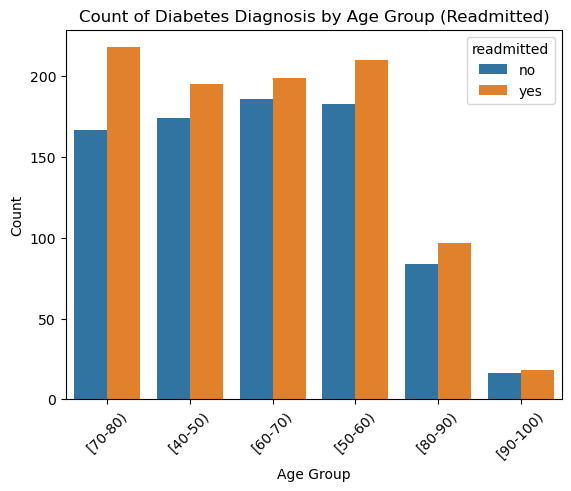

In [29]:
sns.countplot(data=diabetes_pattient, x='age', hue='readmitted')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Diabetes Diagnosis by Age Group (Readmitted)')
plt.xticks(rotation=45)
plt.show()

We can see that in all ages groups thee pattients readmitted once the first diagnosis is diabates is higher that the no readmitted.

Now lets see what is the percentage of patients who take diabetes medicine are readmited

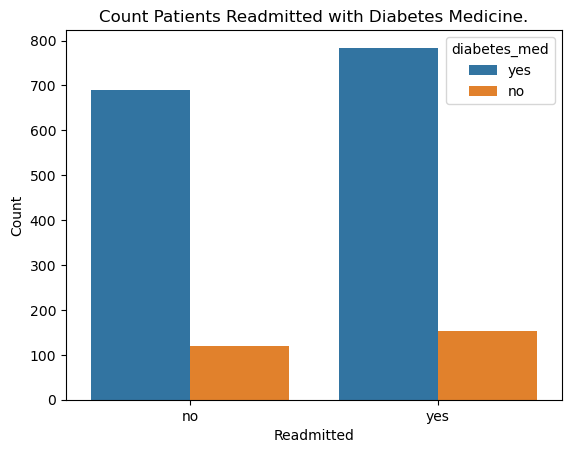

In [30]:
sns.countplot(data=diabetes_pattient, x='readmitted', hue='diabetes_med')
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Count Patients Readmitted with Diabetes Medicine.')
plt.show()

since these plor dont show us a clear pattern, we establish the percentage of pattients who where readmitted:

In [31]:
total_pattients = diabetes_pattient['diag_1'].value_counts()

In [32]:
# Count of pattients readmitted with diabetes medicine
yy = diabetes_pattient[(diabetes_pattient['readmitted'] == 'yes') & (diabetes_pattient['diabetes_med'] == 'yes')]['readmitted'].value_counts()

# Count of pattients readmitted with no diabetes medicine
yn = diabetes_pattient[(diabetes_pattient['readmitted'] == 'yes') & (diabetes_pattient['diabetes_med'] == 'no')]['readmitted'].value_counts()

# Count of pattients no readmitted with diabetes medicine
ny = diabetes_pattient[(diabetes_pattient['readmitted'] == 'no') & (diabetes_pattient['diabetes_med'] == 'yes')]['readmitted'].value_counts()

# Count of pattienss no readmitted with no diabetes medicine
yn = diabetes_pattient[(diabetes_pattient['readmitted'] == 'no') & (diabetes_pattient['diabetes_med'] == 'no')]['readmitted'].value_counts()


# Percentages
total_pattients = diabetes_pattient['diag_1'].value_counts()

yy_p = (int(yy) * 100) / int(total_pattients)
yn_p = (int(yn) * 100) / int(total_pattients)
ny_p = (int(ny) * 100) / int(total_pattients)
nn_p = (int(yn) * 100) / int(total_pattients)

print(f'The percentage of patients readmitted and with diabetes medication is {yy_p:.2f}%')
print(f'The percentage of patients readmitted and no diabetes medication is {yn_p:.2f}%')
print(f'The percentage of patients no readmitted and with diabetes medication is {ny_p:.2f}%')
print(f'The percentage of patients no readmitted and with no diabetes medication is {nn_p:.2f}%')


The percentage of patients readmitted and with diabetes medication is 44.88%
The percentage of patients readmitted and no diabetes medication is 6.87%
The percentage of patients no readmitted and with diabetes medication is 39.50%
The percentage of patients no readmitted and with no diabetes medication is 6.87%


/tmp/ipykernel_7160/553721277.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  yy_p = (int(yy) * 100) / int(total_pattients)
/tmp/ipykernel_7160/553721277.py:18: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  yn_p = (int(yn) * 100) / int(total_pattients)
/tmp/ipykernel_7160/553721277.py:19: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  ny_p = (int(ny) * 100) / int(total_pattients)
/tmp/ipykernel_7160/553721277.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  nn_p = (int(yn) * 100) / int(total_pattients)


- **The percentage of patients readmitted and with diabetes medication is 44.88%**: 

This suggests that a significant portion of patients who are readmitted to the hospital are also taking diabetes medication. It may indicate that diabetes management could be a factor contributing to readmissions, and further investigation into the effectiveness of diabetes treatment and management is warranted.

- **The percentage of patients readmitted and no diabetes medication is 6.87%**: 

This percentage is relatively low compared to the previous category. It implies that there are patients who are readmitted without taking diabetes medication. The reasons for readmission in this group could be related to factors other than diabetes, and it's essential to identify these factors for better patient care.

- **The percentage of patients not readmitted and with diabetes medication is 39.50%**: 

A significant proportion of patients who are not readmitted are taking diabetes medication. This suggests that diabetes management might be effective in reducing readmissions, as a lower percentage of patients in this category are readmitted.

- **The percentage of patients not readmitted and with no diabetes medication is 6.87%**: 

Similar to the second category, this percentage is relatively low. It indicates that some patients who are not readmitted are not taking diabetes medication. The reasons for not taking medication could be diverse, and it's important to understand why some patients in this group are not receiving diabetes treatment.

In summary, these percentages highlight the relationship between readmission, diabetes medication, and patient outcomes. They suggest that diabetes management may have an impact on readmission rates, and healthcare providers should pay attention to patients with diabetes, ensuring they receive appropriate care and medication to potentially reduce the risk of readmission. Additionally, further analysis and investigation may be necessary to uncover the specific factors contributing to readmissions in different patient groups.

### Time in the Hospital.

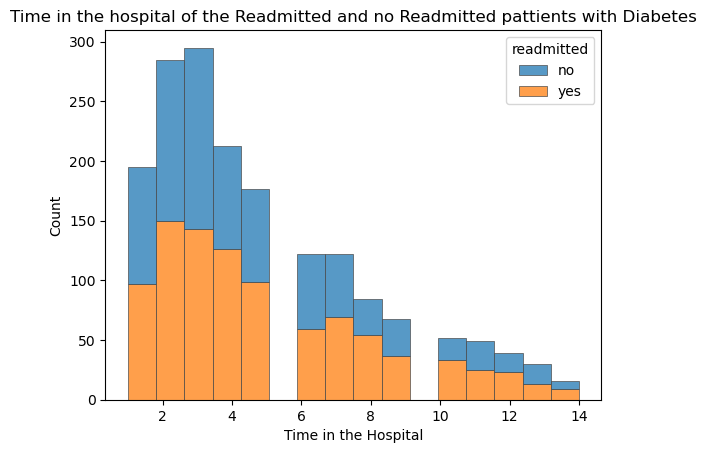

In [33]:
sns.histplot(data=diabetes_pattient, x='time_in_hospital', hue='readmitted', multiple="stack", edgecolor=".3", linewidth=.5)
plt.xlabel('Time in the Hospital')
plt.ylabel('Count')
plt.title('Time in the hospital of the Readmitted and no Readmitted pattients with Diabetes')
plt.show()

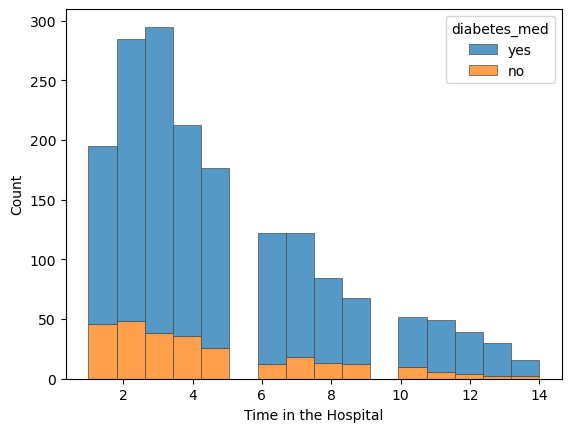

In [34]:
sns.histplot(data=diabetes_pattient, x='time_in_hospital', hue='diabetes_med', multiple="stack", edgecolor=".3", linewidth=.5)
plt.xlabel('Time in the Hospital')
plt.ylabel('Count')
plt.show()


In [35]:
diabetes_pattient['time_in_hospital'].mean()

4.807097882083572

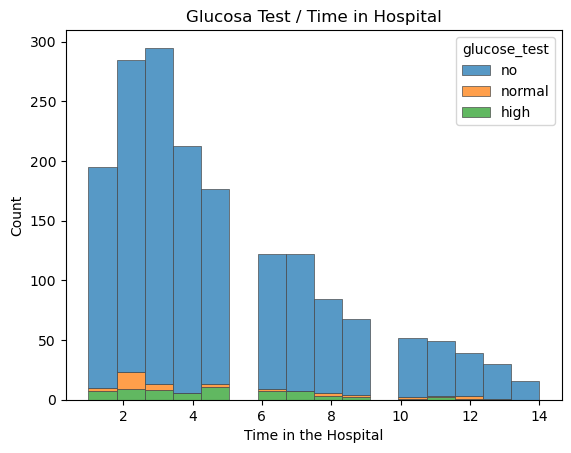

In [36]:
sns.histplot(data=diabetes_pattient, x='time_in_hospital', hue='glucose_test', multiple="stack", edgecolor=".3", linewidth=.5)
plt.xlabel('Time in the Hospital')
plt.ylabel('Count')
plt.title('Glucosa Test / Time in Hospital')
plt.show()

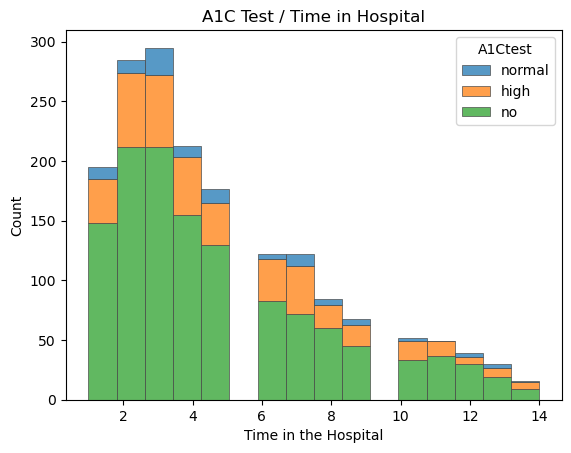

In [37]:
sns.histplot(data=diabetes_pattient, x='time_in_hospital', hue='A1Ctest', multiple="stack", edgecolor=".3", linewidth=.5)
plt.xlabel('Time in the Hospital')
plt.ylabel('Count')
plt.title('A1C Test / Time in Hospital')
plt.show()


Based on the observation that the diabetes patients spend a mean of 4.8 hours in the hospital, and that most of them do not undergo glucose or A1C tests, some preliminary conclusions can be drawn:

 - **Hospital Stay Duration:** Most diabetes patients appear to have a relatively short hospital stay, ranging from 1 to 5 hours. This could indicate that their conditions are manageable within a short period or that they are in the hospital for reasons not directly related to their diabetes.

 - **Diabetes Medication:** Despite the presence of diabetes in most of these patients, it's important to note that not all of them receive diabetes medication during their stay. This could be due to various factors, such as the type of diabetes, the severity of the disease, or hospital treatment policies.

- **Glucose and A1C Tests:** The lack of glucose and A1C tests in the majority of diabetes patients is a concern. These tests are essential for assessing and controlling blood sugar levels, which is crucial for effective diabetes management. The absence of these tests could indicate an opportunity for improvement in the healthcare provided to these patients.

However, it's important to emphasize that these are preliminary conclusions, It's also essential to consider other factors, such as hospital policies, treatment protocols, and individual patient needs. Therefore, conducting a deeper analysis and consulting with medical professionals is recommended to make informed decisions regarding the care of diabetes patients in the hospital.

### Laboratory Procedures.

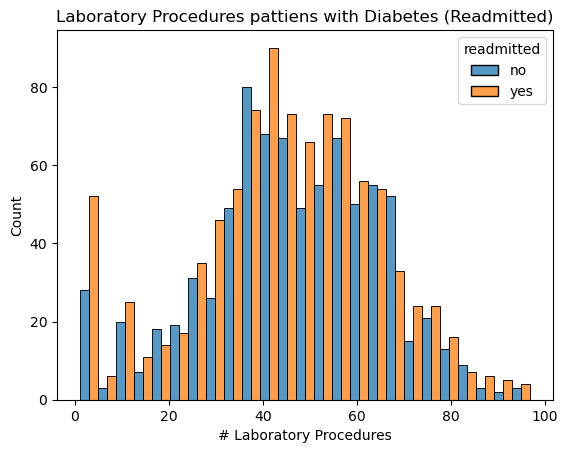

In [38]:
sns.histplot(data=diabetes_pattient, x='n_lab_procedures', hue='readmitted', multiple='dodge')
plt.xlabel('# Laboratory Procedures')
plt.ylabel('Count')
plt.title('Laboratory Procedures pattiens with Diabetes (Readmitted)')
plt.show()

In [39]:
import scipy.stats as stats

# Supongamos que tienes dos listas de datos: 'procedimientos_diabetes_readmitidos' y 'procedimientos_diabetes_no_readmitidos'
# Cada lista contiene la cantidad de procedimientos de laboratorio para los dos grupos respectivamente.
procedimientos_diabetes_readmitidos = diabetes_pattient[diabetes_pattient['readmitted'] == 'yes']['n_lab_procedures'].mean()
procedimientos_diabetes_no_readmitidos = diabetes_pattient[diabetes_pattient['readmitted'] == 'no']['n_lab_procedures'].mean()

# Realiza la prueba t de Student para comparar las medias
t_stat, p_value = stats.ttest_ind(procedimientos_diabetes_readmitidos, procedimientos_diabetes_no_readmitidos)

# Define el nivel de significancia (alfa)
alpha = 0.05

# Compara el valor p con el nivel de significancia
if p_value < alpha:
    print("Hay evidencia de diferencia significativa en la cantidad de procedimientos.")
else:
    print("No hay evidencia de diferencia significativa en la cantidad de procedimientos.")


No hay evidencia de diferencia significativa en la cantidad de procedimientos.


/home/mlefair/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


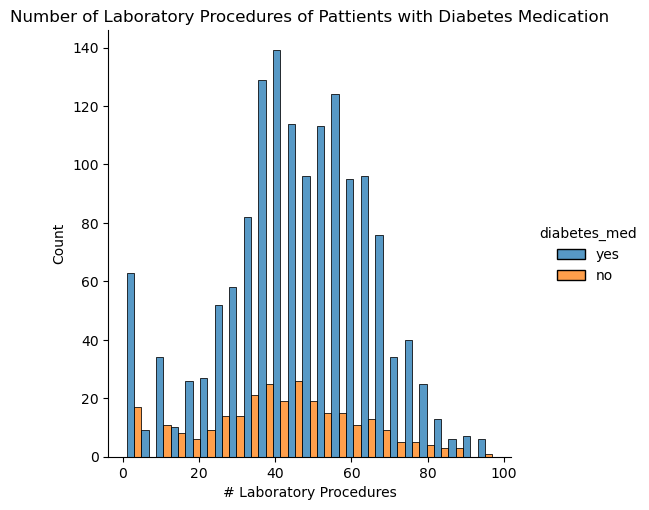

In [40]:
sns.displot(data=diabetes_pattient, x='n_lab_procedures', hue='diabetes_med', multiple='dodge')
plt.xlabel('# Laboratory Procedures')
plt.ylabel('Count')
plt.title('Number of Laboratory Procedures of Pattients with Diabetes Medication')
plt.show()


### Medications.

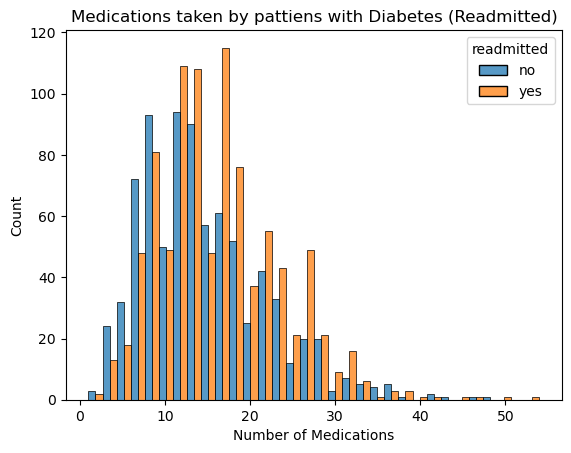

In [41]:
sns.histplot(data=diabetes_pattient, x='n_medications', hue='readmitted', multiple="dodge")
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.title('Medications taken by pattiens with Diabetes (Readmitted)')
plt.show()

<Axes: xlabel='n_medications', ylabel='Count'>

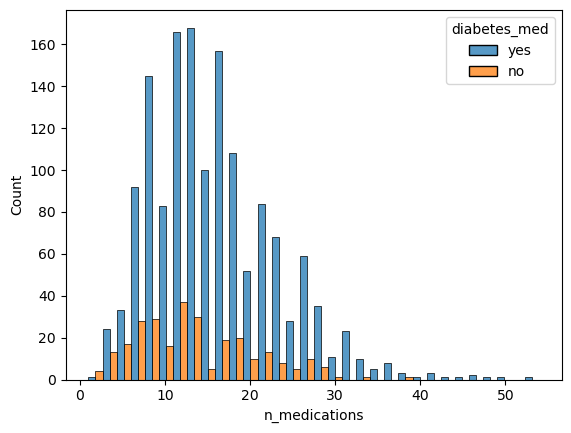

In [42]:
sns.histplot(data=diabetes_pattient, x='n_medications', hue='diabetes_med', multiple="dodge")


### Relation between Glucosa Test and A1C Test with readmittions.

From the **Table - Glucosa Test / Time in Hospital** and **Table - A1C Test / Time in Hospital** we can see that the mayoriti of the pattients does not have been performet these test, so  need to see if there is any relation betweeen these and the rate of readmitions. 

In [43]:
glucose_no = diabetes_pattient[diabetes_pattient['glucose_test'] == 'no']
glucose_normal = diabetes_pattient[diabetes_pattient['glucose_test'] == 'normal']
glucose_high = diabetes_pattient[diabetes_pattient['glucose_test'] == 'high']

In [44]:
glucose_no['readmitted'].value_counts()

readmitted
yes    876
no     771
Name: count, dtype: int64

In [45]:
glucose_normal['readmitted'].value_counts()

readmitted
yes    19
no     17
Name: count, dtype: int64

In [46]:
glucose_high['readmitted'].value_counts()

readmitted
yes    42
no     22
Name: count, dtype: int64

from these results is clear that when the glucose test are high, the pattients readmitted is the double than pattients not readmitted, lets see if there is a stadistical significance in these samples:

In [51]:
contingency_table_glucose = pd.crosstab(diabetes_pattient['readmitted'], diabetes_pattient['glucose_test'])


In [52]:
contingency_table_glucose

glucose_test,high,no,normal
readmitted,,,
no,22,771,17
yes,42,876,19


In [56]:
chi2, p, _, _ = stats.chi2_contingency(contingency_table_glucose)

print("Valor de chi-cuadrado:", chi2)
print("Valor p:", p)

# Evaluate the stadistic significance
if p < 0.05:
    print("There is a significant association between patient groups of readmitted patients and glucose levels.")
else:
    print("No significant association was found between the groups of readmitted pattients and glucose levels.")


Valor de chi-cuadrado: 3.843011005646301
Valor p: 0.1463864109968038
No significant association was found between the groups of readmitted pattients and glucose levels.


In [58]:
contingency_table_a1ctest = pd.crosstab(diabetes_pattient['readmitted'], diabetes_pattient['A1Ctest'])
contingency_table_a1ctest

A1Ctest,high,no,normal
readmitted,,,
no,212,552,46
yes,190,693,54


<Axes: xlabel='A1Ctest', ylabel='count'>

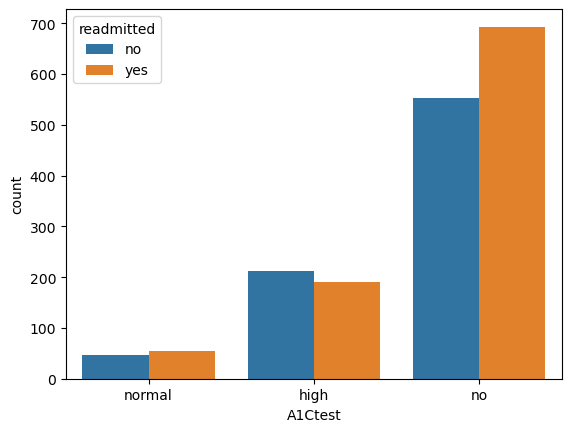

In [64]:
sns.countplot(data=diabetes_pattient, x='A1Ctest', hue='readmitted')


In [59]:
chi2, p, _, _ = stats.chi2_contingency(contingency_table_a1ctest)

print("Valor de chi-cuadrado:", chi2)
print("Valor p:", p)

# Evaluate the stadistic significance
if p < 0.05:
    print("There is a significant association between patient groups of readmitted patients and A1C levels.")
else:
    print("No significant association was found between the groups of readmitted pattients and A1C levels.")


Valor de chi-cuadrado: 8.625841521502052
Valor p: 0.01339437065385161
There is a significant association between patient groups of readmitted patients and A1C levels.


### Focus Group of pattients with high-probability of readmition.

From all the information obtained in the pasts sections, we can see that all the patiens have similar probability of readmittion, but is true that among these that the patients with diabetes have the most probability of readmittion, so we focus our effors in understaning the behaivor of the diabetes patients given the data of the hospital, but we can see that the only significant association with readmittions is with the A1C Levels.

### Model to predict the likelihood of readmission.

Descarting the Diabetes as the maing factor of the readmittions rate, we have to focus on somewhere else, so, we define a model of logistic regresion, to predict and see the importance of each feature of readmittions.

Accuracy: 0.61
              precision    recall  f1-score   support

          no       0.60      0.79      0.68      2658
         yes       0.63      0.41      0.49      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.59      5000
weighted avg       0.61      0.61      0.59      5000



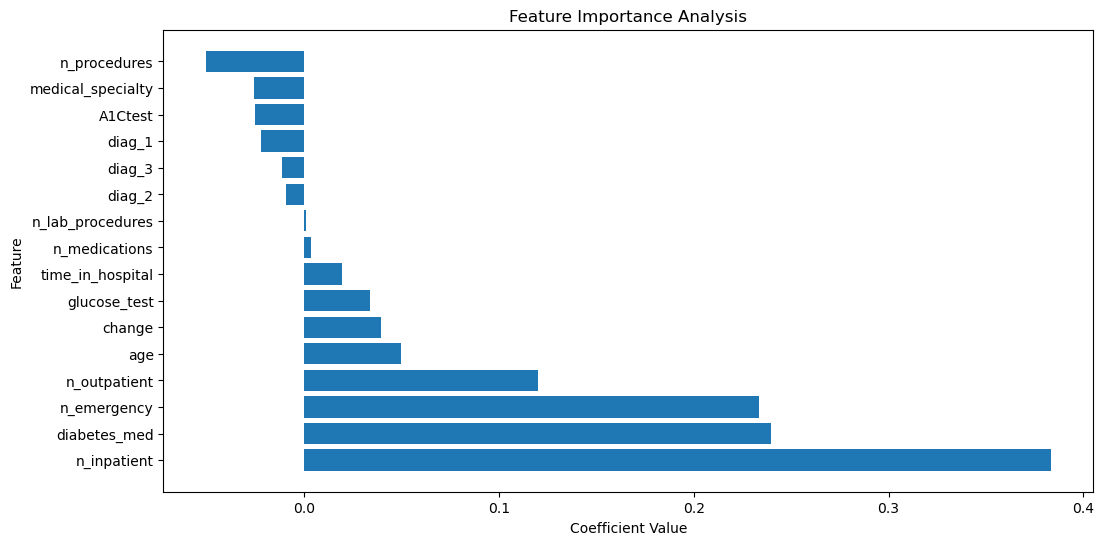

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert categorical columns to numerical using Label Encoding
categorical_cols = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']
label_encoder = LabelEncoder()

for col in categorical_cols:
    h[col] = label_encoder.fit_transform(h[col])

# Define features (X) and target (y)
X = h.drop(columns=['readmitted'])
y = h['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
coef = model.coef_[0]  # Coefficients of the logistic regression model

# Create a DataFrame to map features to their coefficients
feature_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})
feature_coef = feature_coef.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_coef['Feature'], feature_coef['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()


The coefficients in a logistic regression model can provide valuable insights into the relationships between the features (independent variables) and the probability of the outcome (in this case, readmission). In your logistic regression model, you mentioned that certain features have coefficients with positive values:

- **n_inpatient (Coefficient ≈ 0.38):**

A positive coefficient for n_inpatient suggests that an increase in the number of inpatient visits in the year before hospitalization (prior hospitalizations) is associated with a higher log-odds of readmission.
**Interpretation:** Patients with a history of more inpatient visits in the previous year are more likely to be readmitted.

- **diabetes_med (Coefficient ≈ 0.24):**

A positive coefficient for diabetes_med suggests that the use of diabetes medication (prescribed diabetes medication) is associated with a higher log-odds of readmission.
**Interpretation:** Patients who are prescribed diabetes medication are more likely to be readmitted.

- **n_emergency (Coefficient ≈ 0.238):**

A positive coefficient for n_emergency suggests that an increase in the number of visits to the emergency room in the year before hospitalization is associated with a higher log-odds of readmission.
**Interpretation:** Patients with a history of more emergency room visits in the previous year are more likely to be readmitted.

These interpretations are based on the logistic regression model's coefficients, and they indicate that these three features are positively associated with an increased likelihood of readmission. However, it's important to note that these coefficients provide information about associations, not causation.

## Conclusion.

This report provides insights into hospital readmissions, with a focus on diabetes patients. While diabetes diagnosis appears to be a factor in readmissions, other variables, such as A1C levels, also play a significant role. The logistic regression model offers a starting point for predicting readmissions, but additional refinement is required for practical implementation.

The hospital should consider the findings of this analysis to prioritize follow-up efforts on patients with a higher probability of readmission, especially those with diabetes and elevated A1C levels. Further data collection and model optimization can lead to more accurate predictions and better patient care strategies.